In [1]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # 임퓨터 불러오기
import missingno as msno
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
sw = pd.read_csv('seattle-weather.csv')
sw = sw.iloc[0:1000, ]
sw

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
995,2014-09-22,0.3,22.2,15.0,2.1,rain
996,2014-09-23,18.3,18.9,14.4,2.5,rain
997,2014-09-24,20.3,18.9,14.4,2.7,rain
998,2014-09-25,4.3,21.7,14.4,2.5,rain


<AxesSubplot:>

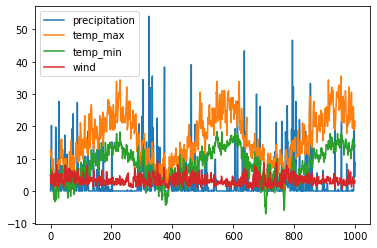

In [3]:
sw.plot()

In [5]:
sw_x= sw[['temp_max','temp_min','wind']]
msv2 = np.random.randint(0, 1000, size = 80)
sw_x.iloc[msv2] = np.nan

<ipython-input-5-0a6363e0c42b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sw_x.iloc[msv2] = np.nan


In [7]:
sw_x.isna().sum()

temp_max    80
temp_min    80
wind        80
dtype: int64

### 기초통계량(평균)을 이용한 결측값 대체

In [9]:
sw1 =pd.concat([sw_x ,sw['precipitation']],axis=1)
sw2 =pd.concat([sw_x ,sw['precipitation']],axis=1)
sw3 =pd.concat([sw_x ,sw['precipitation']],axis=1)

In [11]:
sw1['temp_max'] = sw1['temp_max'].fillna(sw_x.temp_max.mean())
sw1['temp_min'] = sw1['temp_min'].fillna(sw_x.temp_min.mean())
sw1['wind'] = sw1['wind'].fillna(sw_x.wind.mean())

In [13]:
sw1.isna().sum()

temp_max         0
temp_min         0
wind             0
precipitation    0
dtype: int64

In [14]:
x_train = sw1.drop('precipitation', axis = 1).iloc[0:700, ]
x_test = sw1.drop('precipitation', axis = 1).iloc[701:1000, ]
y_train = sw1['precipitation'].iloc[0:700, ]
y_test = sw1['precipitation'].iloc[701:1000, ]

In [15]:
fit_train1 = sm.OLS(y_train, x_train)
fit_train1 = fit_train1.fit()

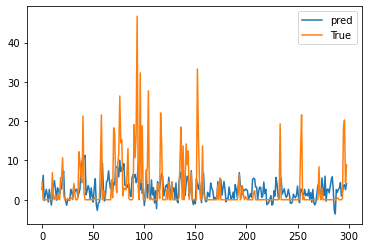

In [16]:
plt.plot(np.array(fit_train1.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_true = y_test, y_pred = fit_train1.predict(x_test))
print(mse1)

35.49897637154249


### 보간법을 이용한 결측값 대체

In [19]:
sw2['temp_max'] = sw2['temp_max'].interpolate(method = 'linear')
sw2['temp_min'] = sw2['temp_min'].interpolate(method = 'linear')
sw2['wind'] = sw2['wind'].interpolate(method = 'linear')

In [20]:
sw2.isna().sum()

temp_max         0
temp_min         0
wind             0
precipitation    0
dtype: int64

In [21]:
x_train = sw2.drop('precipitation', axis = 1).iloc[0:700, ]
x_test = sw2.drop('precipitation', axis = 1).iloc[701:1000, ]
y_train = sw2['precipitation'].iloc[0:700, ]
y_test = sw2['precipitation'].iloc[701:1000, ]

In [22]:
fit_train2 = sm.OLS(y_train, x_train)
fit_train2 = fit_train2.fit()

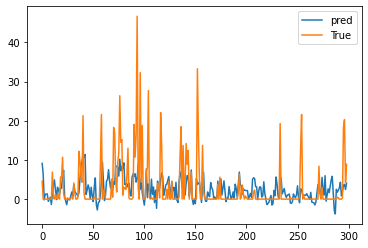

In [23]:
plt.plot(np.array(fit_train2.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_true = y_test, y_pred = fit_train2.predict(x_test))
print(mse2)

35.122943657650744


### iterative imputer를 이용한 결측값 대체

In [25]:
imputer = IterativeImputer(imputation_order = 'descending',
                           random_state=111,
                           n_nearest_features=None)

sw3 =imputer.fit_transform(sw3)
sw3

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


array([[12.8,  5. ,  4.7,  0. ],
       [10.6,  2.8,  4.5, 10.9],
       [11.7,  7.2,  2.3,  0.8],
       ...,
       [18.9, 14.4,  2.7, 20.3],
       [21.7, 14.4,  2.5,  4.3],
       [20. , 13.9,  3.3,  8.9]])

In [26]:
sw3 = pd.DataFrame(sw3)
sw3.isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [27]:
sw3.columns = ['precipitation', 'temp_max', 'temp_min', 'wind']
sw3

,precipitation,temp_max,temp_min,wind
0,12.8,5.0,4.7,0.0
1,10.6,2.8,4.5,10.9
2,11.7,7.2,2.3,0.8
3,12.2,5.6,4.7,20.3
4,8.9,2.8,6.1,1.3
...,...,...,...,...
995,22.2,15.0,2.1,0.3
996,18.9,14.4,2.5,18.3
997,18.9,14.4,2.7,20.3
998,21.7,14.4,2.5,4.3


In [29]:
x_train = sw3.drop('precipitation', axis = 1).iloc[0:700, ]
x_test = sw3.drop('precipitation', axis = 1).iloc[701:1000, ]
y_train = sw3['precipitation'].iloc[0:700, ]
y_test = sw3['precipitation'].iloc[701:1000, ]

In [30]:
fit_train3 = sm.OLS(y_train, x_train)
fit_train3 = fit_train3.fit()

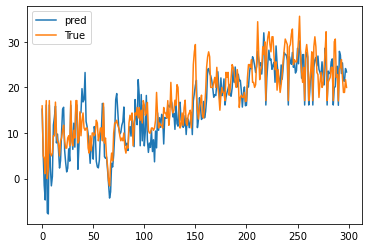

In [31]:
plt.plot(np.array(fit_train3.predict(x_test)), label = 'pred')
plt.plot(np.array(y_test), label = 'True')
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error
mse3 = mean_squared_error(y_true = y_test, y_pred = fit_train3.predict(x_test))
print(mse3)

15.285211861760276


### 결측치 대체 결과 비교

In [33]:
print('단순평균대치법 :', mse1)
print('선형보간법 :', mse2)
print('iterative imputer :', mse3)

단순평균대치법 : 35.49897637154249
선형보간법 : 35.122943657650744
iterative imputer : 15.285211861760276
